# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read csv file

In [2]:
df=pd.read_csv('Covid19India.csv')
df

C:\Users\Mithun kumar\AppData\Local\Temp\ipykernel_14108\2904675075.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Covid19India.csv')


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
145844,22790,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
145845,22791,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145846,22792,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145847,22793,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


In [3]:
data=df.iloc[:,1:]
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


# Inspect the DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145849 entries, 0 to 145848
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          145846 non-null  float64
 1   Date Announced     145849 non-null  object 
 2   Age Bracket        60013 non-null   object 
 3   Gender             62808 non-null   object 
 4   Detected City      10949 non-null   object 
 5   Detected District  137451 non-null  object 
 6   Detected State     145840 non-null  object 
 7   Current Status     145847 non-null  object 
 8   Day                145849 non-null  int64  
 9   Month              145849 non-null  int64  
 10  Year               145849 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


# Inspect null values in each column

In [5]:
data.isnull().sum().sort_values()

Date Announced            0
Day                       0
Month                     0
Year                      0
Current Status            2
Num Cases                 3
Detected State            9
Detected District      8398
Gender                83041
Age Bracket           85836
Detected City        134900
dtype: int64

In [6]:
data.isnull().sum().sort_values(ascending=False)/len(data)*100

Detected City        92.492921
Age Bracket          58.852649
Gender               56.936283
Detected District     5.758010
Detected State        0.006171
Num Cases             0.002057
Current Status        0.001371
Date Announced        0.000000
Day                   0.000000
Month                 0.000000
Year                  0.000000
dtype: float64

In [7]:
round(data.isnull().sum().sort_values(ascending=False)/len(data)*100,2)

Detected City        92.49
Age Bracket          58.85
Gender               56.94
Detected District     5.76
Detected State        0.01
Num Cases             0.00
Current Status        0.00
Date Announced        0.00
Day                   0.00
Month                 0.00
Year                  0.00
dtype: float64

# Inspect null values in each row

In [8]:
data.isnull().sum(axis=1).sort_values(ascending=False)

69008     6
69009     6
28451     6
28398     5
28968     5
         ..
123250    0
123251    0
123252    0
11680     0
0         0
Length: 145849, dtype: int64

# 1. Total covid19 cases monthwise

In [9]:
data.groupby('Month')[['Num Cases']].sum()

,Num Cases
Month,
1,1.0
2,2.0
3,1635.0
4,36078.0
5,242853.0
6,663178.0
7,270185.0


In [10]:
#  same as above line. above one is in the form of dataframe
data.groupby('Month')['Num Cases'].sum()

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

In [11]:
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


In [12]:
data['Current Status']=='Hospitalized'

0         False
1         False
2         False
3         False
4         False
          ...  
145844     True
145845    False
145846    False
145847    False
145848    False
Name: Current Status, Length: 145849, dtype: bool

In [13]:
data[data['Current Status']=='Hospitalized']

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
18,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Hospitalized,4,3,2020
19,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Hospitalized,4,3,2020
21,1.0,04/03/2020,NaN,M,Agra,Agra,Uttar Pradesh,Hospitalized,4,3,2020
26,1.0,04/03/2020,NaN,NaN,Agra,Agra,Uttar Pradesh,Hospitalized,4,3,2020
27,1.0,04/03/2020,NaN,NaN,NaN,Agra,Uttar Pradesh,Hospitalized,4,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
145820,226.0,07/07/2020,NaN,NaN,NaN,NaN,Assam,Hospitalized,7,7,2020
145821,5.0,07/07/2020,NaN,NaN,NaN,Papum Pare,Arunachal Pradesh,Hospitalized,7,7,2020
145822,1.0,07/07/2020,NaN,NaN,NaN,Namsai,Arunachal Pradesh,Hospitalized,7,7,2020
145841,10.0,07/07/2020,NaN,NaN,NaN,Daman,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020


In [14]:
data[data['Current Status']=='Hospitalized'].groupby('Month')[['Num Cases']].sum()

,Num Cases
Month,
3,1431.0
4,33209.0
5,155781.0
6,395144.0
7,157701.0


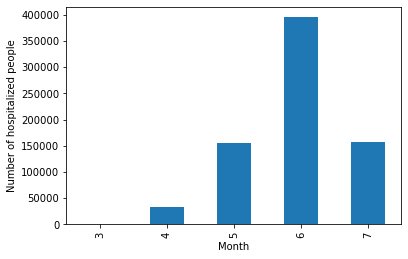

In [15]:
M=data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
M.plot.bar()
plt.ylabel('Number of hospitalized people')
plt.show()

# 2. Total male/female infected with coronavirus

In [16]:
data.groupby('Gender')['Num Cases'].sum()

Gender
F             21294.0
M             42795.0
M                 1.0
Non-Binary       12.0
Name: Num Cases, dtype: float64

In [17]:
data['Gender'].unique()

array(['F', nan, 'M', 'Non-Binary', 'M '], dtype=object)

In [18]:
# replacing 'M ' with 'M'
data['Gender'].replace('M ','M',inplace=True)

In [19]:
# filtering and removing rows containing 'Non Binary' in gender column
gender=data[~(data['Gender']=='Non-Binary')]
gender

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
145844,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
145845,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145846,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145847,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


In [20]:
gender.groupby('Gender')['Num Cases'].sum()

Gender
F    21294.0
M    42796.0
Name: Num Cases, dtype: float64

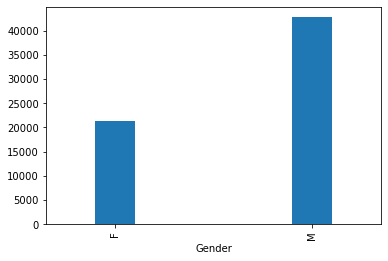

In [21]:
N=gender.groupby('Gender')['Num Cases'].sum()
N.plot.bar(width=0.2)
plt.show()

In [22]:
## since, here sorting has been used, we can not keep 'Num Cases' in double [] to get output as a DataFrame
data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False)

Age Bracket
30.0       1209.0
40.0       1027.0
25.0       1015.0
35.0        992.0
32.0        936.0
            ...  
97.0          1.0
96.0          1.0
95.0          1.0
9 Month       1.0
99.0          1.0
Name: Num Cases, Length: 325, dtype: float64

# Top 10 data

In [23]:
P=data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
P

Age Bracket
30.0    1209.0
40.0    1027.0
25.0    1015.0
35.0     992.0
32.0     936.0
45.0     893.0
24.0     880.0
28.0     858.0
27.0     818.0
26.0     810.0
Name: Num Cases, dtype: float64

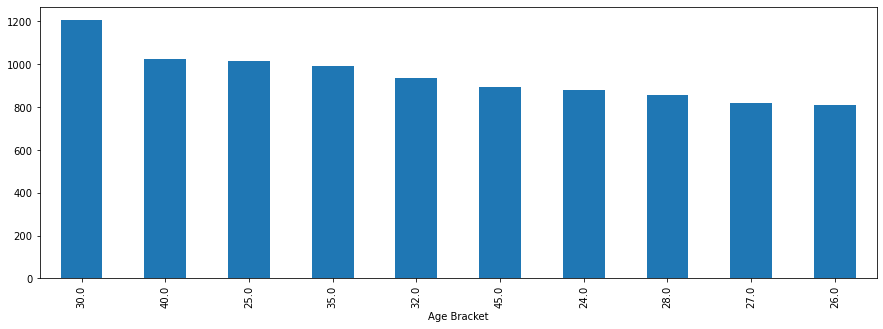

In [24]:
P.plot.bar(figsize=(15,5))
plt.show()

# 4.Check state wise total active cases in India

In [25]:
Q=data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
Q

Detected State
Maharashtra                                 217107.0
Tamil Nadu                                  118587.0
Delhi                                       102827.0
Gujarat                                      37631.0
Uttar Pradesh                                29959.0
Telangana                                    27610.0
Karnataka                                    26743.0
West Bengal                                  23831.0
Rajasthan                                    21400.0
Andhra Pradesh                               21195.0
Haryana                                      17987.0
Madhya Pradesh                               15625.0
Assam                                        13337.0
Bihar                                        12524.0
Odisha                                       10096.0
Jammu and Kashmir                             8930.0
Punjab                                        6747.0
Kerala                                        5834.0
State Unassigned               

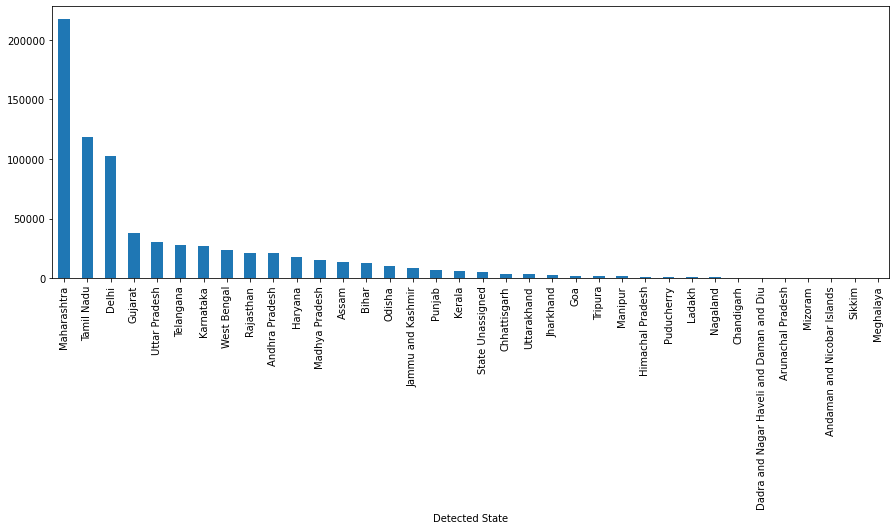

In [26]:
Q.plot.bar(figsize=(15,5))
plt.show()

# 5. How many cases everyday

In [27]:
Day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
7     3      22718.0
      4      24018.0
      5      23942.0
      6      22500.0
      7      23147.0

[124 rows x 1 columns]

In [28]:
Day.unstack(level=0)

Num Cases                                  
Month         3       4       5        6        7
Day                                              
1           NaN   423.0  2396.0   7723.0  19429.0
2           NaN   485.0  2564.0   8812.0  21947.0
3           NaN   556.0  2952.0   9689.0  22718.0
4           5.0   576.0  3656.0   9847.0  24018.0
5           1.0   606.0  2971.0   9472.0  23942.0
6           NaN   485.0  3602.0  10408.0  22500.0
7           2.0   570.0  3344.0  10882.0  23147.0
8           NaN   563.0  3339.0   8536.0      NaN
9           4.0   812.0  3175.0   9981.0      NaN
10          4.0   870.0  4311.0  11156.0      NaN
11          8.0   853.0  3592.0  11135.0      NaN
12          4.0   758.0  3562.0  11306.0      NaN
13          6.0  1243.0  3726.0  12039.0      NaN
14         11.0  1031.0  3991.0  11404.0      NaN
15          8.0   884.0  3808.0  10032.0      NaN
16         12.0  1061.0  4794.0  11085.0      NaN
17         14.0   922.0  5049.0  13108.0      NaN
18         22.0  1370.0  4628.0  13829.0      NaN
19         21.0  1579.0  6154.0  14740.0      NaN
20         52.0  1239.0  5720.0  15918.0      NaN
21         67.0  1537.0  6023.0  15151.0      NaN
22         59.0  1292.0  6536.0  13560.0      NaN
23         82.0  1667.0  6665.0  15656.0      NaN
24         63.0  1408.0  7111.0  16868.0      NaN
25         75.0  1835.0  6414.0  18205.0      NaN
26         58.0  1607.0  5907.0  18255.0      NaN
27        140.0  1568.0  7246.0  20142.0      NaN
28        123.0  1902.0  7254.0  19610.0      NaN
29        106.0  1705.0  8138.0  18339.0      NaN
30        178.0  1802.0  8364.0  18256.0      NaN
31        306.0     NaN  8789.0      NaN      NaN

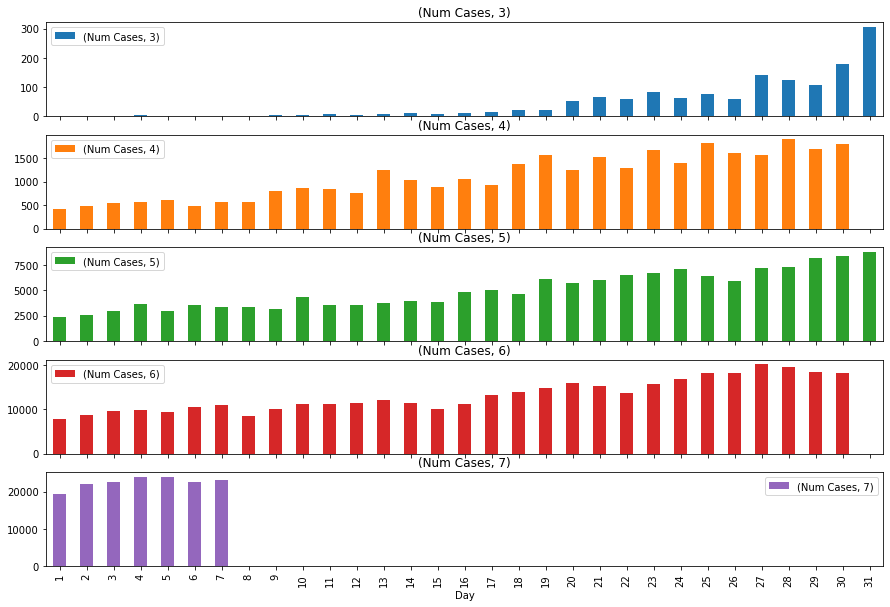

In [29]:
Day.unstack(level=0).plot(kind='bar',subplots=True,figsize=(15,10))
plt.show()


# 6. Number of people who died

In [30]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

In [31]:
data[data['Current Status']=='Deceased']['Num Cases'].sum()

19817.0

In [32]:
data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

Detected State
Maharashtra                                 8919.0
Delhi                                       3112.0
Gujarat                                     1831.0
Tamil Nadu                                  1613.0
Uttar Pradesh                                798.0
West Bengal                                  787.0
Madhya Pradesh                               521.0
Rajasthan                                    432.0
Karnataka                                    409.0
Telangana                                    289.0
Haryana                                      276.0
Andhra Pradesh                               221.0
Punjab                                       159.0
Jammu and Kashmir                            138.0
Bihar                                         97.0
Odisha                                        54.0
Uttarakhand                                   43.0
Kerala                                        27.0
Jharkhand                                     19.0
Assam           